Name: Vedant Modi
<br>
APS Failure at Scania Trucks. (2017). UCI Machine Learning Repository. https://doi.org/10.24432/C51S51.

## 1. Tree-Based Methods

Import packages

In [121]:
import pandas as pd
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn import svm
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt
import math
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, accuracy_score, auc
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.model_selection import LeaveOneOut, GridSearchCV,StratifiedKFold ,KFold
from imblearn.over_sampling import SMOTE

### (a) Download the APS Failure data

In [3]:
testDF = pd.read_csv(f"../data/aps_failure_test_set.csv", skiprows=20, na_values='na')
testDF

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,60,0.0,2.000000e+01,12.0,0.0,0.0,0.0,0.0,0.0,...,1098.0,138.0,412.0,654.0,78.0,88.0,0.0,0.0,0.0,0.0
1,neg,82,0.0,6.800000e+01,40.0,0.0,0.0,0.0,0.0,0.0,...,1068.0,276.0,1620.0,116.0,86.0,462.0,0.0,0.0,0.0,0.0
2,neg,66002,2.0,2.120000e+02,112.0,0.0,0.0,0.0,0.0,0.0,...,495076.0,380368.0,440134.0,269556.0,1315022.0,153680.0,516.0,0.0,0.0,0.0
3,neg,59816,NaN,1.010000e+03,936.0,0.0,0.0,0.0,0.0,0.0,...,540820.0,243270.0,483302.0,485332.0,431376.0,210074.0,281662.0,3232.0,0.0,0.0
4,neg,1814,NaN,1.560000e+02,140.0,0.0,0.0,0.0,0.0,0.0,...,7646.0,4144.0,18466.0,49782.0,3176.0,482.0,76.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,neg,81852,NaN,2.130706e+09,892.0,0.0,0.0,0.0,0.0,0.0,...,632658.0,273242.0,510354.0,373918.0,349840.0,317840.0,960024.0,25566.0,0.0,0.0
15996,neg,18,0.0,5.200000e+01,46.0,8.0,26.0,0.0,0.0,0.0,...,266.0,44.0,46.0,14.0,2.0,0.0,0.0,0.0,0.0,0.0
15997,neg,79636,NaN,1.670000e+03,1518.0,0.0,0.0,0.0,0.0,0.0,...,806832.0,449962.0,778826.0,581558.0,375498.0,222866.0,358934.0,19548.0,0.0,0.0
15998,neg,110,NaN,3.600000e+01,32.0,0.0,0.0,0.0,0.0,0.0,...,588.0,210.0,180.0,544.0,1004.0,1338.0,74.0,0.0,0.0,0.0


In [4]:
trainDF = pd.read_csv(f"../data/aps_failure_training_set.csv", skiprows=20, na_values='na')
trainDF

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,neg,153002,NaN,6.640000e+02,186.0,0.0,0.0,0.0,0.0,0.0,...,998500.0,566884.0,1290398.0,1218244.0,1019768.0,717762.0,898642.0,28588.0,0.0,0.0
59996,neg,2286,NaN,2.130707e+09,224.0,0.0,0.0,0.0,0.0,0.0,...,10578.0,6760.0,21126.0,68424.0,136.0,0.0,0.0,0.0,0.0,0.0
59997,neg,112,0.0,2.130706e+09,18.0,0.0,0.0,0.0,0.0,0.0,...,792.0,386.0,452.0,144.0,146.0,2622.0,0.0,0.0,0.0,0.0
59998,neg,80292,NaN,2.130706e+09,494.0,0.0,0.0,0.0,0.0,0.0,...,699352.0,222654.0,347378.0,225724.0,194440.0,165070.0,802280.0,388422.0,0.0,0.0


### (b) Data Preparation

#### (i) Research what types of techniques are usually used

1. Mean/Median/Mode Imputation (for Numerical Data): Replace missing numerical values with the mean, median, or mode of the respective variable. This is a simple and quick method but can lead to distortion of the data distribution, especially if there are many missing values.

2. Constant Value Imputation (for Numerical or Categorical Data): Replace missing values with a specific constant (e.g., 0 or -1). This is useful when the missingness is informative, and the constant is a valid value for the variable.

3. Forward Fill and Backward Fill (for Time Series Data): In time series data, you can fill missing values with the previous (forward fill) or the next (backward fill) available value. This is useful when data points are recorded at regular intervals.


4. Linear Interpolation (for Time Series Data): Interpolate missing values based on linear relationships between neighboring data points. This is commonly used for time series data where values change continuously over time.


5. K-Nearest Neighbors (KNN) Imputation (for Numerical Data): Estimate missing values by considering the values of the nearest neighbors in the feature space. This method is effective when the dataset has a substantial number of complete data points.


6. Multiple Imputation (for Numerical or Categorical Data): Generate multiple datasets with different imputed values to account for uncertainty. Multiple imputation can be combined with regression, decision trees, or other models to impute missing values.

Since we're using univariate data, mean, median, and mode seem like straighforward choices for us to impute our data. I will use median.

In [5]:
trainDF.iloc[:, 1:] = trainDF.iloc[:, 1:].fillna(trainDF.iloc[:, 1:].median())
trainDF

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,0.0,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,0.0,0.000000e+00,126.0,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,0.0,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,0.0,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,neg,153002,0.0,6.640000e+02,186.0,0.0,0.0,0.0,0.0,0.0,...,998500.0,566884.0,1290398.0,1218244.0,1019768.0,717762.0,898642.0,28588.0,0.0,0.0
59996,neg,2286,0.0,2.130707e+09,224.0,0.0,0.0,0.0,0.0,0.0,...,10578.0,6760.0,21126.0,68424.0,136.0,0.0,0.0,0.0,0.0,0.0
59997,neg,112,0.0,2.130706e+09,18.0,0.0,0.0,0.0,0.0,0.0,...,792.0,386.0,452.0,144.0,146.0,2622.0,0.0,0.0,0.0,0.0
59998,neg,80292,0.0,2.130706e+09,494.0,0.0,0.0,0.0,0.0,0.0,...,699352.0,222654.0,347378.0,225724.0,194440.0,165070.0,802280.0,388422.0,0.0,0.0


In [6]:
testDF.iloc[:, 1:] = testDF.iloc[:, 1:].fillna(testDF.iloc[:, 1:].median())
testDF

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,60,0.0,2.000000e+01,12.0,0.0,0.0,0.0,0.0,0.0,...,1098.0,138.0,412.0,654.0,78.0,88.0,0.0,0.0,0.0,0.0
1,neg,82,0.0,6.800000e+01,40.0,0.0,0.0,0.0,0.0,0.0,...,1068.0,276.0,1620.0,116.0,86.0,462.0,0.0,0.0,0.0,0.0
2,neg,66002,2.0,2.120000e+02,112.0,0.0,0.0,0.0,0.0,0.0,...,495076.0,380368.0,440134.0,269556.0,1315022.0,153680.0,516.0,0.0,0.0,0.0
3,neg,59816,0.0,1.010000e+03,936.0,0.0,0.0,0.0,0.0,0.0,...,540820.0,243270.0,483302.0,485332.0,431376.0,210074.0,281662.0,3232.0,0.0,0.0
4,neg,1814,0.0,1.560000e+02,140.0,0.0,0.0,0.0,0.0,0.0,...,7646.0,4144.0,18466.0,49782.0,3176.0,482.0,76.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,neg,81852,0.0,2.130706e+09,892.0,0.0,0.0,0.0,0.0,0.0,...,632658.0,273242.0,510354.0,373918.0,349840.0,317840.0,960024.0,25566.0,0.0,0.0
15996,neg,18,0.0,5.200000e+01,46.0,8.0,26.0,0.0,0.0,0.0,...,266.0,44.0,46.0,14.0,2.0,0.0,0.0,0.0,0.0,0.0
15997,neg,79636,0.0,1.670000e+03,1518.0,0.0,0.0,0.0,0.0,0.0,...,806832.0,449962.0,778826.0,581558.0,375498.0,222866.0,358934.0,19548.0,0.0,0.0
15998,neg,110,0.0,3.600000e+01,32.0,0.0,0.0,0.0,0.0,0.0,...,588.0,210.0,180.0,544.0,1004.0,1338.0,74.0,0.0,0.0,0.0


#### (ii) Calculate the coefficient of variation

In [7]:
cv_series = trainDF.iloc[:, 1:].std() / trainDF.iloc[:, 1:].mean()

In [8]:
cv_df = pd.DataFrame({'Column': cv_series.index, 'Coefficient of Variation (CV)': cv_series.values})
display(cv_df)

,Column,Coefficient of Variation (CV)
0,aa_000,2.450938
1,ab_000,10.383494
2,ac_000,2.310241
3,ad_000,244.322816
4,ae_000,24.200137
...,...,...
165,ee_007,5.012754
166,ee_008,3.259079
167,ee_009,5.691612
168,ef_000,49.366659


#### (iii) Plot a correlation matrix

In [9]:
correlation_matrix = trainDF.iloc[:, 1:].corr()

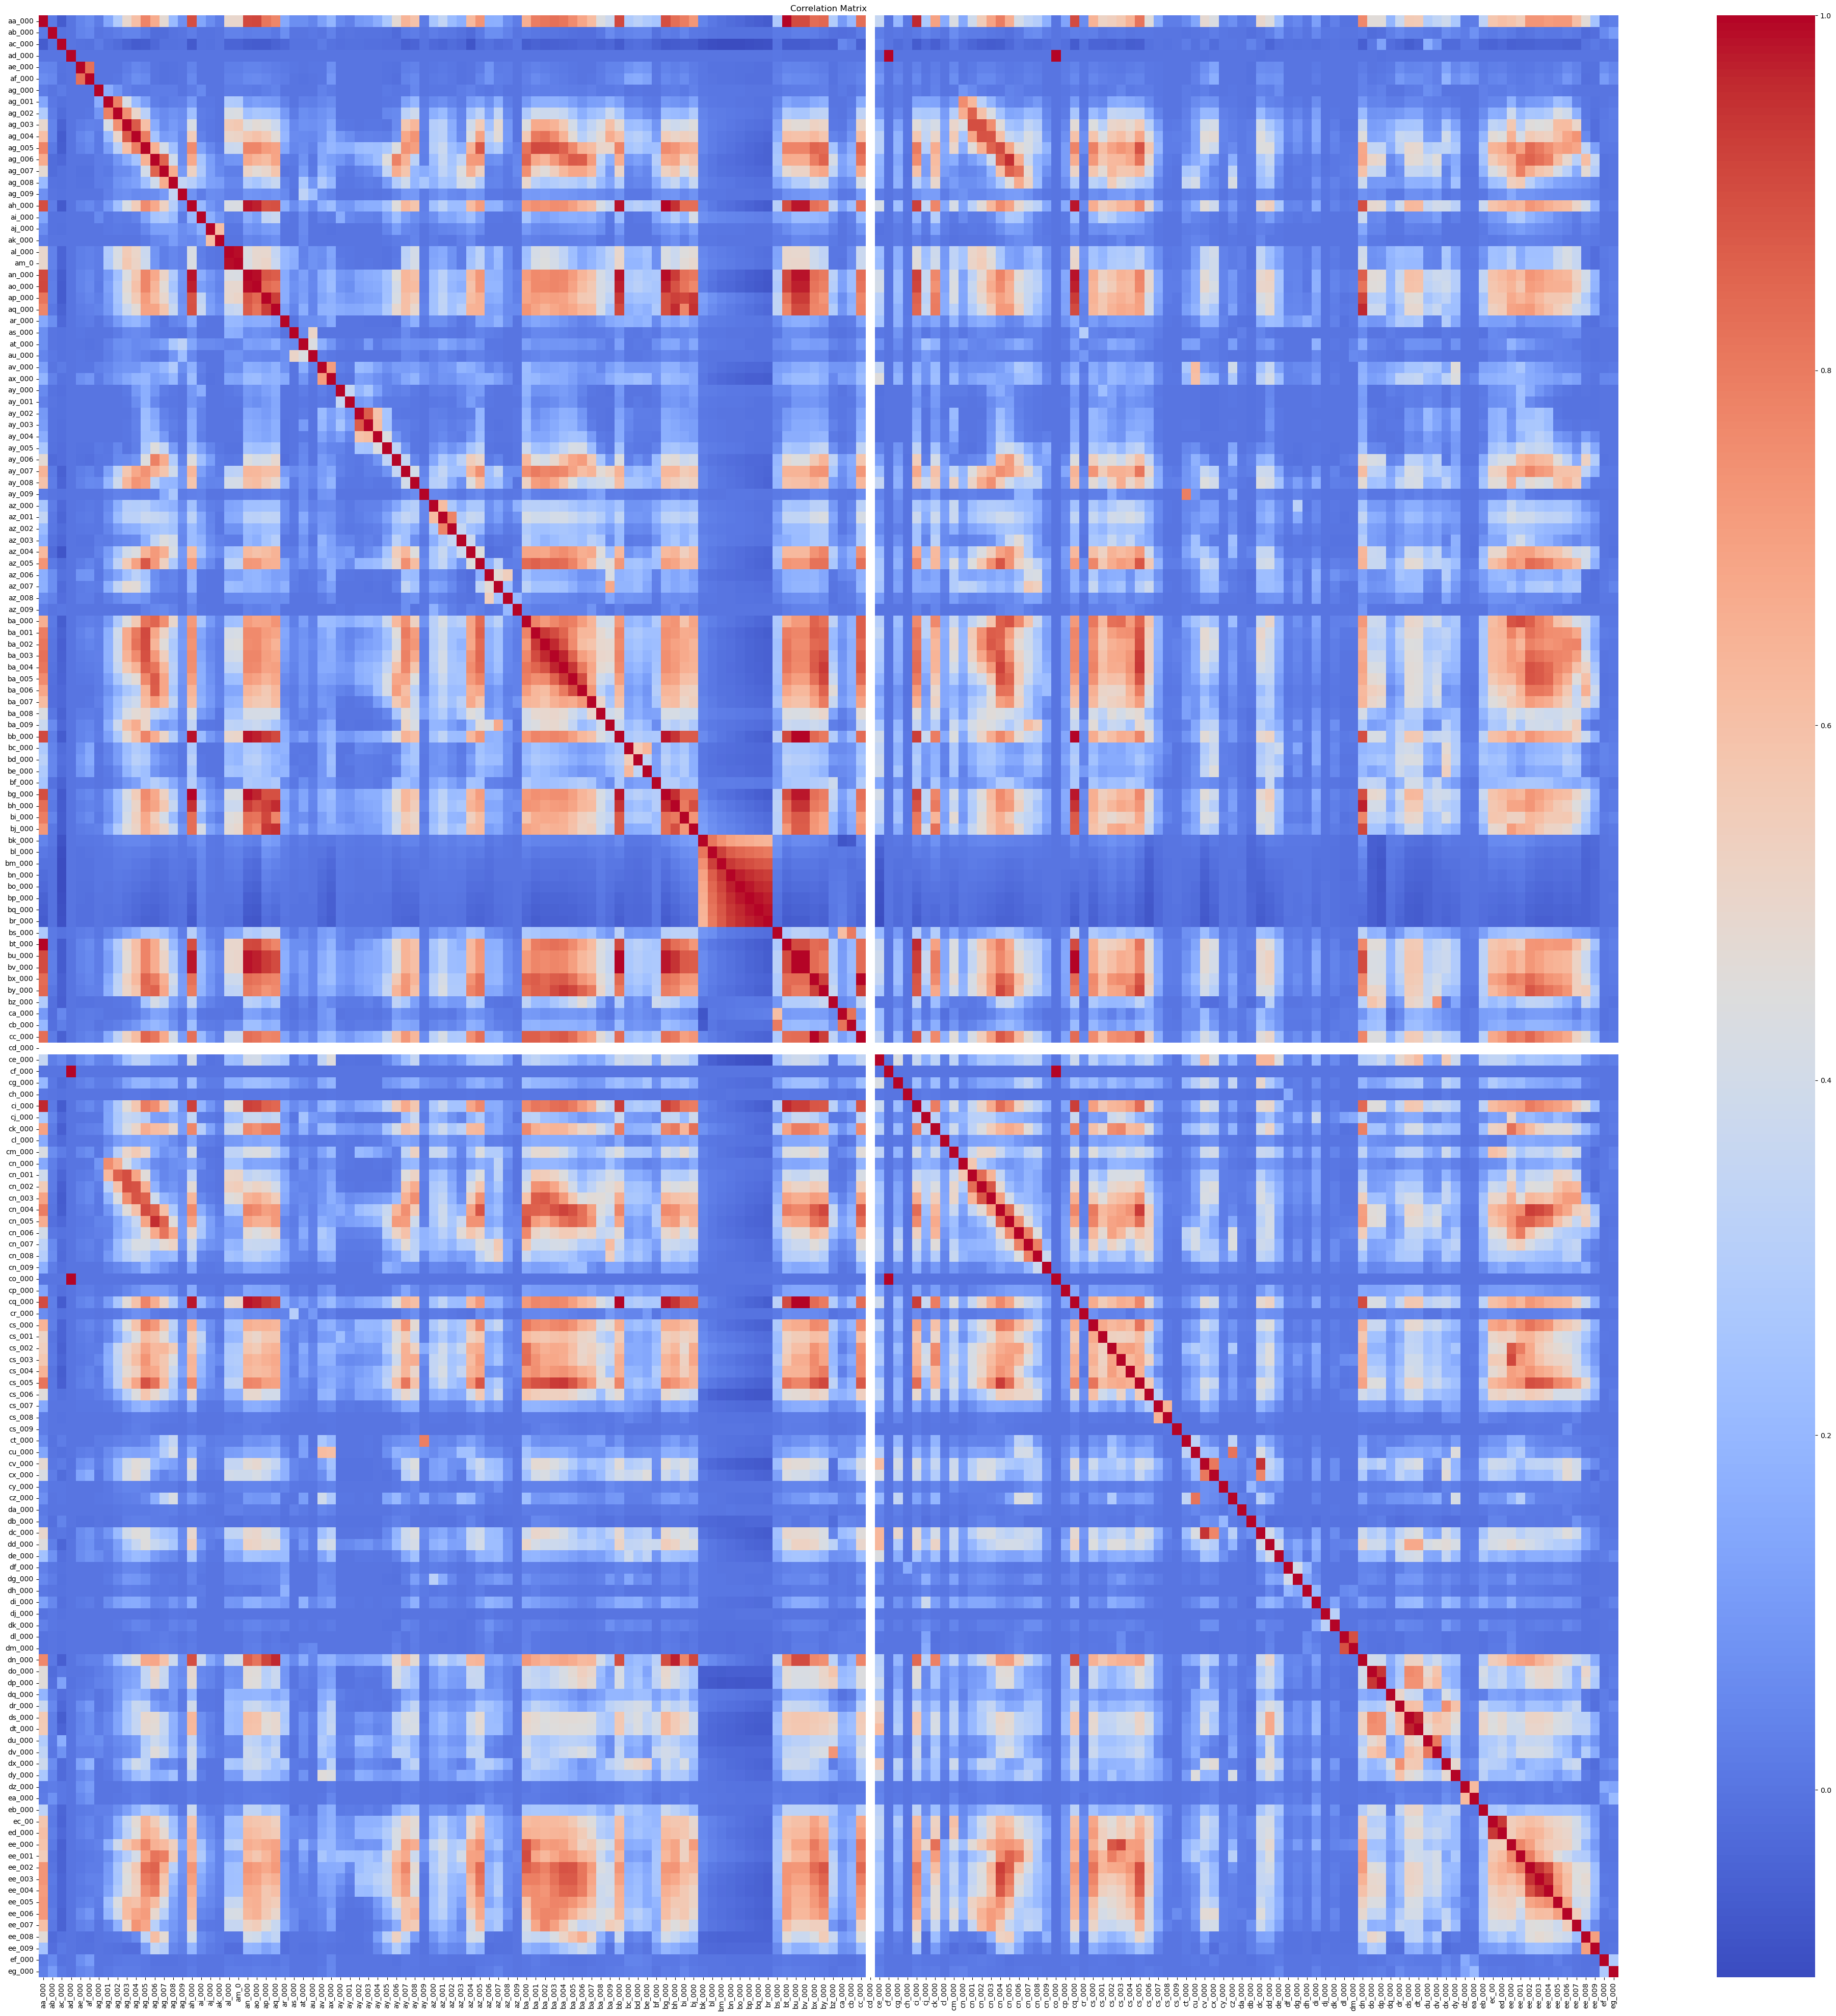

In [10]:
plt.figure(figsize=(50, 50))
sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.title("Correlation Matrix")
mng = plt.get_current_fig_manager()
mng.full_screen_toggle()
plt.show()

#### (iv) Make scatter plots and box plots

In [11]:
cv_df_sorted = cv_df.sort_values(by='Coefficient of Variation (CV)', ascending=False)

In [12]:
features_to_select = math.floor(math.sqrt(170))
features_to_select

13

In [13]:
top_features_df = cv_df_sorted.head(features_to_select)
top_features_df

,Column,Coefficient of Variation (CV)
91,cf_000,244.887517
109,co_000,244.507385
3,ad_000,244.322816
122,cs_009,237.930554
136,dh_000,123.216097
138,dj_000,117.494225
6,ag_000,92.917755
27,as_000,87.332500
41,ay_009,84.733735
19,ak_000,80.424975


In [14]:
top_features = top_features_df.Column.tolist()
top_features

['cf_000',
 'co_000',
 'ad_000',
 'cs_009',
 'dh_000',
 'dj_000',
 'ag_000',
 'as_000',
 'ay_009',
 'ak_000',
 'az_009',
 'ch_000',
 'au_000']

In [15]:
trainDfTop = trainDF.iloc[:, 1:][top_features]
trainDfTop

,cf_000,co_000,ad_000,cs_009,dh_000,dj_000,ag_000,as_000,ay_009,ak_000,az_009,ch_000,au_000
0,2.0,220.0,280.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,8.0,126.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.0,2.0,66.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,202.0,458.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.0,224.0,186.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59996,2.0,0.0,224.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59997,2.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59998,2.0,580.0,494.0,0.0,190.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


/Users/vedantmodi/anaconda3/envs/dsci552_hw0/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


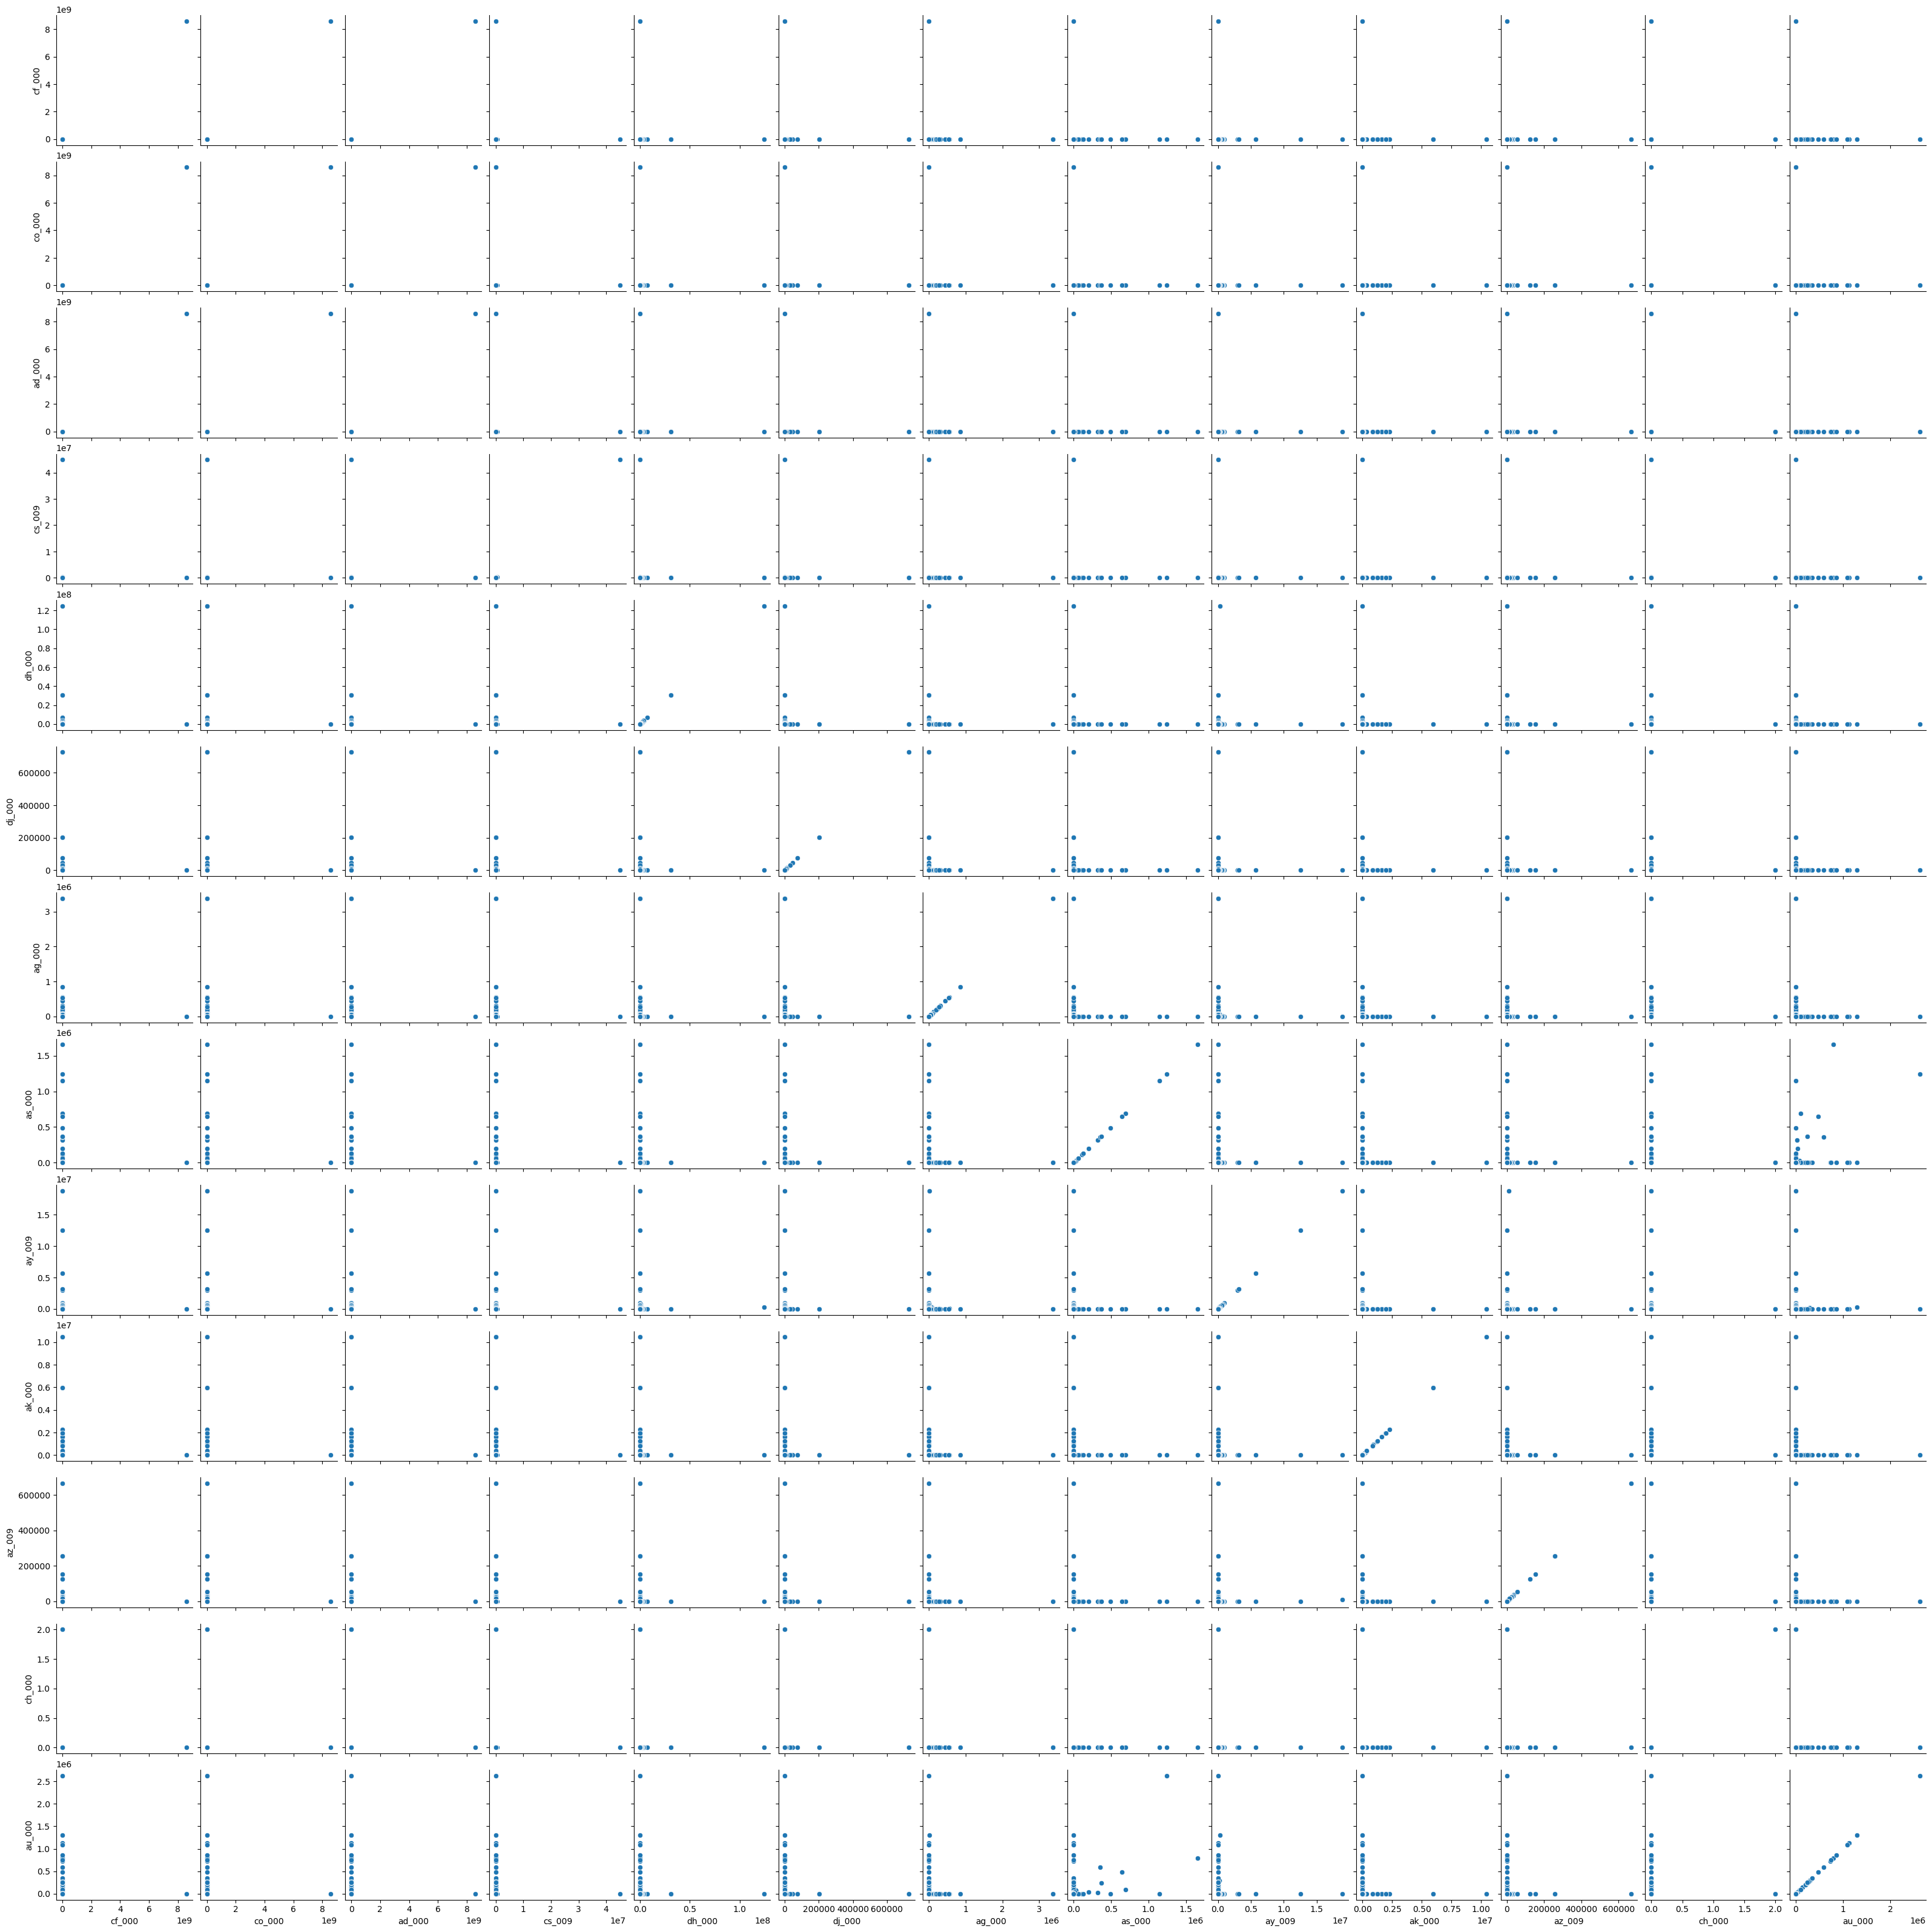

In [16]:
sns.pairplot(trainDfTop[top_features], diag_kind=None)
plt.show()

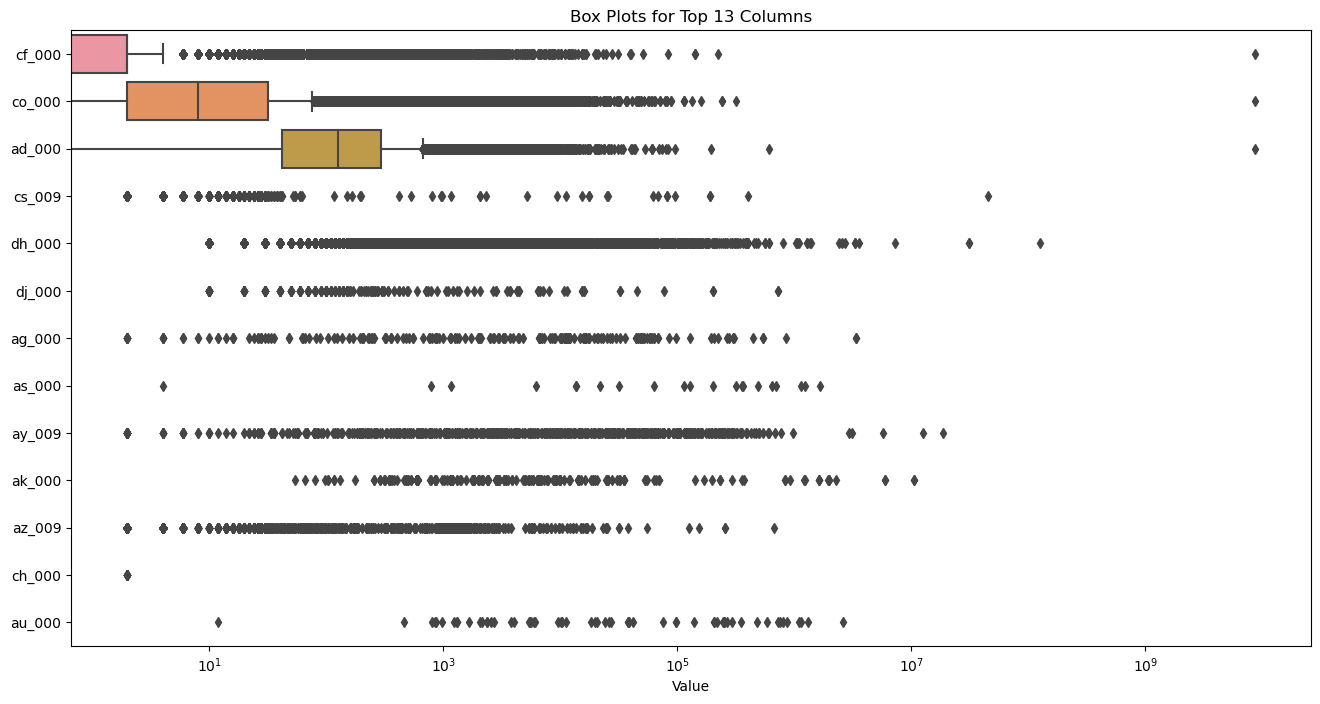

In [20]:
plt.figure(figsize=(16, 8))  
plot = sns.boxplot(data=trainDfTop, orient='h')  
plot.set(xscale="log")
plt.title("Box Plots for Top 13 Columns")
plt.xlabel("Value")
plt.show()

The scatter plots are very scattered and no reasonable conclusion can be reached without further analysis. The linearity seems to be very limited and random, and only in a few cases.

#### (v) Is this data set imbalanced?

In [21]:
trainDF.iloc[:, 0:1].value_counts()

class
neg      59000
pos       1000
Name: count, dtype: int64

In [22]:
testDF.iloc[:, 0:1].value_counts()

class
neg      15625
pos        375
Name: count, dtype: int64

The dataset is clearly very imbalanced.

### (c) Train a random forest

In [38]:
trainDF_X = trainDF.iloc[:, 1:]
trainDF_Y = trainDF.iloc[:, 0:1]
testDF_X = testDF.iloc[:, 1:]
testDF_Y = testDF.iloc[:, 0:1]

In [24]:
trainDF_X

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,76698,0.0,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,33058,0.0,0.000000e+00,126.0,0.0,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,41040,0.0,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,318.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,60874,0.0,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,153002,0.0,6.640000e+02,186.0,0.0,0.0,0.0,0.0,0.0,2564.0,...,998500.0,566884.0,1290398.0,1218244.0,1019768.0,717762.0,898642.0,28588.0,0.0,0.0
59996,2286,0.0,2.130707e+09,224.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10578.0,6760.0,21126.0,68424.0,136.0,0.0,0.0,0.0,0.0,0.0
59997,112,0.0,2.130706e+09,18.0,0.0,0.0,0.0,0.0,0.0,0.0,...,792.0,386.0,452.0,144.0,146.0,2622.0,0.0,0.0,0.0,0.0
59998,80292,0.0,2.130706e+09,494.0,0.0,0.0,0.0,0.0,0.0,0.0,...,699352.0,222654.0,347378.0,225724.0,194440.0,165070.0,802280.0,388422.0,0.0,0.0


In [41]:
class_mapping = {'neg': 0, 'pos': 1}
trainDF_Y['class'] = trainDF_Y['class'].map(class_mapping)

/var/folders/n6/bxq_v0552b73sl2s_298p9k80000gn/T/ipykernel_1378/3242835160.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainDF_Y['class'] = trainDF_Y['class'].map(class_mapping)


In [53]:
class_mapping = {'neg': 0, 'pos': 1}
testDF_Y['class'] = testDF_Y['class'].map(class_mapping)

/var/folders/n6/bxq_v0552b73sl2s_298p9k80000gn/T/ipykernel_1378/1544031869.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testDF_Y['class'] = testDF_Y['class'].map(class_mapping)


In [42]:
trainDF_Y

,class
0,0
1,0
2,0
3,0
4,0
...,...
59995,0
59996,0
59997,0
59998,0


In [55]:
testDF_Y

,class
0,0
1,0
2,0
3,0
4,0
...,...
15995,0
15996,0
15997,0
15998,0


In [43]:
rf_classifier = RandomForestClassifier(oob_score=True, random_state=42)
rf_classifier.fit(trainDF_X, trainDF_Y)

/Users/vedantmodi/anaconda3/envs/dsci552_hw0/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(oob_score=True, random_state=42)

In [44]:
y_train_pred = rf_classifier.predict(trainDF_X)
y_test_pred = rf_classifier.predict(testDF_X)

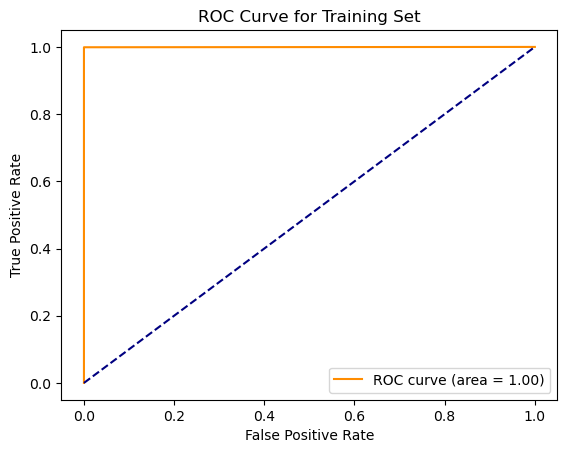

Confusion Matrix for Training Set:
[[59000     0]
 [    1   999]]
Accuracy for Training Set: 0.9999833333333333
AUC for Training Set: 0.9995
Misclassification for Training Set: 1.666666666666483e-05


In [50]:
confusion = confusion_matrix(trainDF_Y, y_train_pred)
accuracy = accuracy_score(trainDF_Y, y_train_pred)

fpr, tpr, _ = roc_curve(trainDF_Y, y_train_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for ' + 'Training Set')
plt.legend(loc="lower right")
plt.show()

print(f"Confusion Matrix for Training Set:\n{confusion}")
print(f"Accuracy for Training Set: {accuracy}")
print(f"AUC for Training Set: {roc_auc}")
print(f"Misclassification for Training Set: {1 - accuracy}")

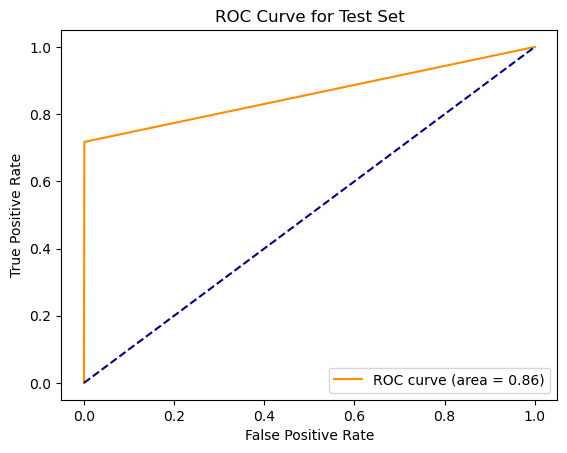

Confusion Matrix for Test Set:
[[15610    15]
 [  106   269]]
Accuracy for Test Set: 0.9924375
AUC for Test Set: 0.8581866666666667
Misclassification for Test Set: 0.0075625000000000275


In [56]:
confusion = confusion_matrix(testDF_Y, y_test_pred)
accuracy = accuracy_score(testDF_Y, y_test_pred)

fpr, tpr, _ = roc_curve(testDF_Y, y_test_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for ' + 'Test Set')
plt.legend(loc="lower right")
plt.show()

print(f"Confusion Matrix for Test Set:\n{confusion}")
print(f"Accuracy for Test Set: {accuracy}")
print(f"AUC for Test Set: {roc_auc}")
print(f"Misclassification for Test Set: {1 - accuracy}")

In [58]:
oob_error = 1 - rf_classifier.oob_score_
print(f"Out of Bag (OOB) Error Estimate: {oob_error}")

test_error = 1 - accuracy_score(testDF_Y, y_test_pred)
print(f"Test Error: {test_error}")

Out of Bag (OOB) Error Estimate: 0.006116666666666659
Test Error: 0.0075625000000000275


<Figure size 800x600 with 0 Axes>

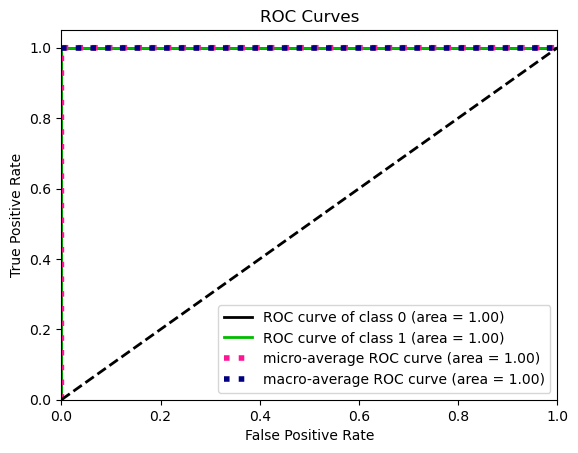

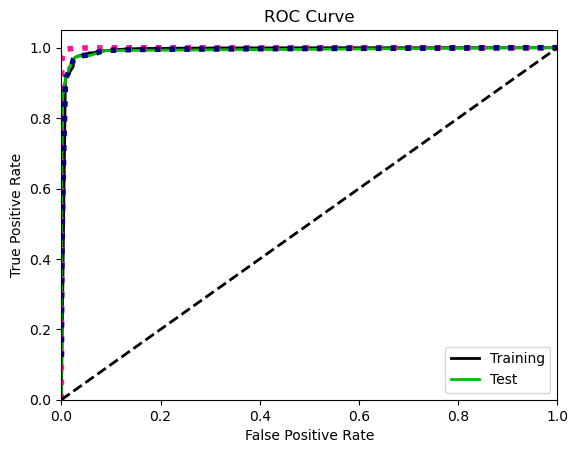

In [64]:
plt.figure(figsize=(8, 6))
skplt.metrics.plot_roc(trainDF_Y, rf_classifier.predict_proba(trainDF_X))
skplt.metrics.plot_roc(testDF_Y, rf_classifier.predict_proba(testDF_X))
plt.title("ROC Curve")
plt.legend(["Training", "Test"])
plt.show()

### (d) Research class imbalance in random forest

a. Resampling:
- Oversampling: Increase the number of samples in the minority class.
- Undersampling: Decrease the number of samples in the majority class.
- Synthetic data generation (e.g., SMOTE).

b. Weighted Random Forest:
Assign higher class weights to the minority class during model training.

c. Cost-sensitive learning:
Modify the class_weight parameter in the RandomForestClassifier.

I have used method c

In [65]:
rf_classifier_balanced = RandomForestClassifier(oob_score=True, random_state=42, class_weight='balanced')
rf_classifier_balanced.fit(trainDF_X, trainDF_Y)

/Users/vedantmodi/anaconda3/envs/dsci552_hw0/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(class_weight='balanced', oob_score=True, random_state=42)

In [66]:
y_train_pred = rf_classifier_balanced.predict(trainDF_X)
y_test_pred = rf_classifier_balanced.predict(testDF_X)

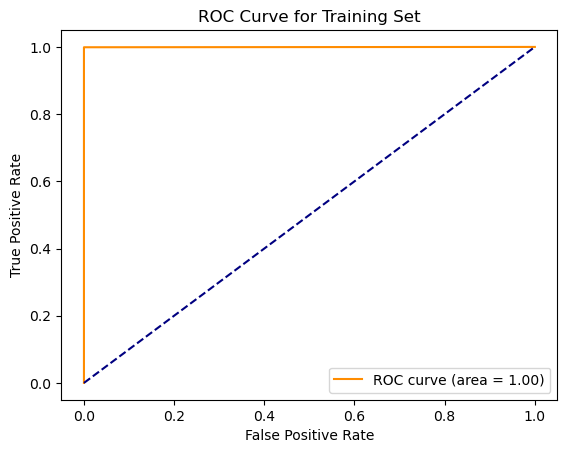

Confusion Matrix for Training Set:
[[59000     0]
 [    1   999]]
Accuracy for Training Set: 0.9999833333333333
AUC for Training Set: 0.9995
Misclassification for Training Set: 1.666666666666483e-05


In [67]:
confusion = confusion_matrix(trainDF_Y, y_train_pred)
accuracy = accuracy_score(trainDF_Y, y_train_pred)

fpr, tpr, _ = roc_curve(trainDF_Y, y_train_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for ' + 'Training Set')
plt.legend(loc="lower right")
plt.show()

print(f"Confusion Matrix for Training Set:\n{confusion}")
print(f"Accuracy for Training Set: {accuracy}")
print(f"AUC for Training Set: {roc_auc}")
print(f"Misclassification for Training Set: {1 - accuracy}")

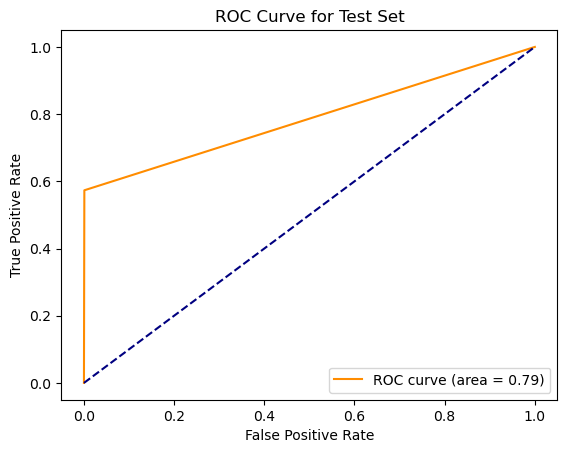

Confusion Matrix for Test Set:
[[15611    14]
 [  160   215]]
Accuracy for Test Set: 0.989125
AUC for Test Set: 0.7862186666666666
Misclassification for Test Set: 0.010874999999999968


In [68]:
confusion = confusion_matrix(testDF_Y, y_test_pred)
accuracy = accuracy_score(testDF_Y, y_test_pred)

fpr, tpr, _ = roc_curve(testDF_Y, y_test_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for ' + 'Test Set')
plt.legend(loc="lower right")
plt.show()

print(f"Confusion Matrix for Test Set:\n{confusion}")
print(f"Accuracy for Test Set: {accuracy}")
print(f"AUC for Test Set: {roc_auc}")
print(f"Misclassification for Test Set: {1 - accuracy}")

In [69]:
oob_error = 1 - rf_classifier_balanced.oob_score_
print(f"Out of Bag (OOB) Error Estimate: {oob_error}")

test_error = 1 - accuracy_score(testDF_Y, y_test_pred)
print(f"Test Error: {test_error}")

Out of Bag (OOB) Error Estimate: 0.008199999999999985
Test Error: 0.010874999999999968


<Figure size 800x600 with 0 Axes>

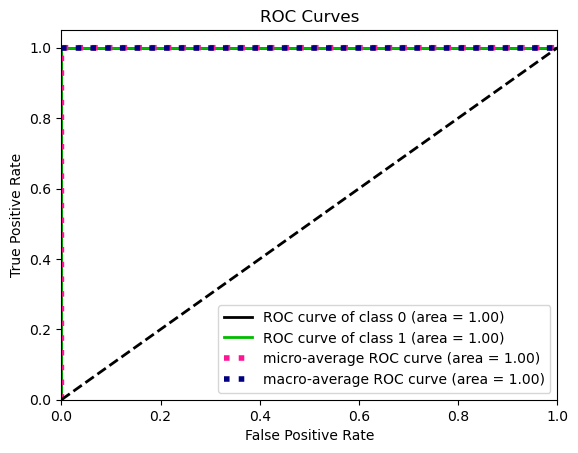

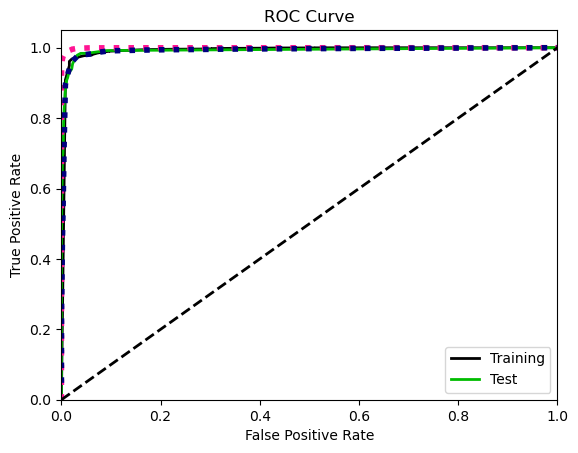

In [70]:
plt.figure(figsize=(8, 6))
skplt.metrics.plot_roc(trainDF_Y, rf_classifier_balanced.predict_proba(trainDF_X))
skplt.metrics.plot_roc(testDF_Y, rf_classifier_balanced.predict_proba(testDF_X))
plt.title("ROC Curve")
plt.legend(["Training", "Test"])
plt.show()

### Observation:
Since our data is imbalanced, to increase the accuracy the model predicts a value as negative and therefore we see a better performnace without resampling techniques.

### (e) XGBoost and Model Trees

In [77]:
ss = StandardScaler()
trainX_col = trainDF_X.columns
testX_col = testDF_X.columns
trainDF_X = pd.DataFrame(ss.fit_transform(trainDF_X), columns = trainX_col)
testDF_X = pd.DataFrame(ss.fit_transform(testDF_X), columns = testX_col)

In [86]:
estimator = XGBClassifier(objective='binary:logistic', colsample_bytree = 0.3, use_label_encoder=False)
alphas = {
    "reg_alpha": [0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 1, 2, 3, 4, 5, 10, 20, 50, 100]
}

In [87]:
cv = KFold(n_splits = 5, shuffle = True, random_state = 42)
grid_cv = GridSearchCV(estimator, alphas, cv=cv, scoring="accuracy")
grid_cv.fit(trainDF_X, trainDF_Y)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.3, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     inte...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'reg_alpha': [0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 1, 2,
                                       3, 4, 5, 10, 20, 50, 100]},
             scoring='accuracy')

In [91]:
print(f'Best alpha: {grid_cv.best_params_} with cross validation accuracy: {grid_cv.best_score_}')

Best alpha: {'reg_alpha': 0.5} with cross validation accuracy: 0.9947833333333334


In [ ]:
estimator = XGBClassifier(objective='binary:logistic', reg_alpha = grid_cv.best_params_['reg_alpha'], colsample_bytree = 0.3, use_label_encoder=False,)
estimator.fit(trainDF_X, trainDF_Y)

In [95]:
y_train_pred = estimator.predict(trainDF_X)
y_test_pred = estimator.predict(testDF_X)

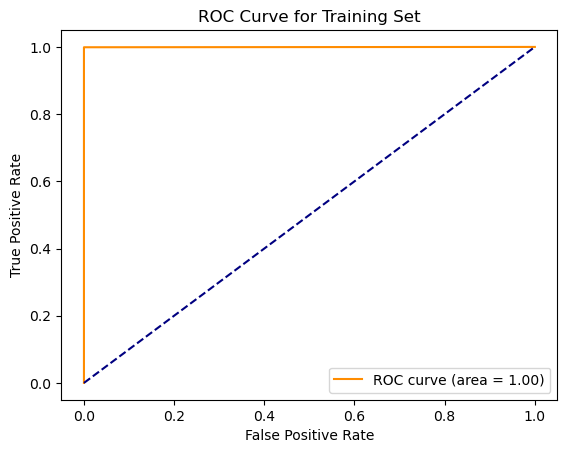

Confusion Matrix for Training Set:
[[59000     0]
 [    1   999]]
Accuracy for Training Set: 0.9999833333333333
AUC for Training Set: 0.9995
Misclassification for Training Set: 1.666666666666483e-05


In [96]:
confusion = confusion_matrix(trainDF_Y, y_train_pred)
accuracy = accuracy_score(trainDF_Y, y_train_pred)

fpr, tpr, _ = roc_curve(trainDF_Y, y_train_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for ' + 'Training Set')
plt.legend(loc="lower right")
plt.show()

print(f"Confusion Matrix for Training Set:\n{confusion}")
print(f"Accuracy for Training Set: {accuracy}")
print(f"AUC for Training Set: {roc_auc}")
print(f"Misclassification for Training Set: {1 - accuracy}")

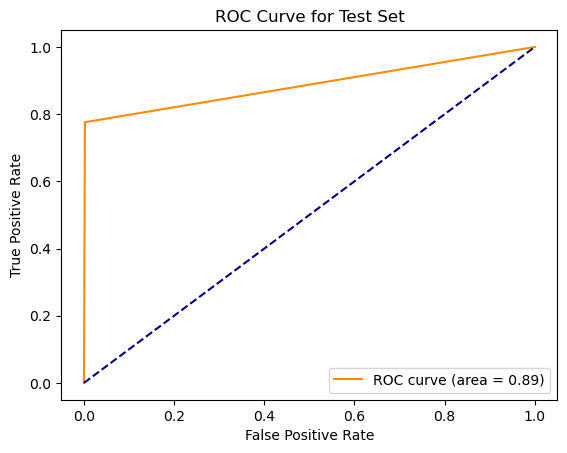

Confusion Matrix for Test Set:
[[15591    34]
 [   84   291]]
Accuracy for Test Set: 0.992625
AUC for Test Set: 0.886912
Misclassification for Test Set: 0.00737500000000002


In [97]:
confusion = confusion_matrix(testDF_Y, y_test_pred)
accuracy = accuracy_score(testDF_Y, y_test_pred)

fpr, tpr, _ = roc_curve(testDF_Y, y_test_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for ' + 'Test Set')
plt.legend(loc="lower right")
plt.show()

print(f"Confusion Matrix for Test Set:\n{confusion}")
print(f"Accuracy for Test Set: {accuracy}")
print(f"AUC for Test Set: {roc_auc}")
print(f"Misclassification for Test Set: {1 - accuracy}")

<Figure size 800x600 with 0 Axes>

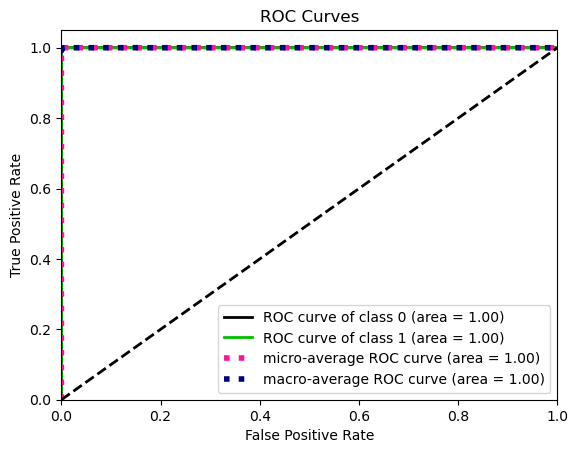

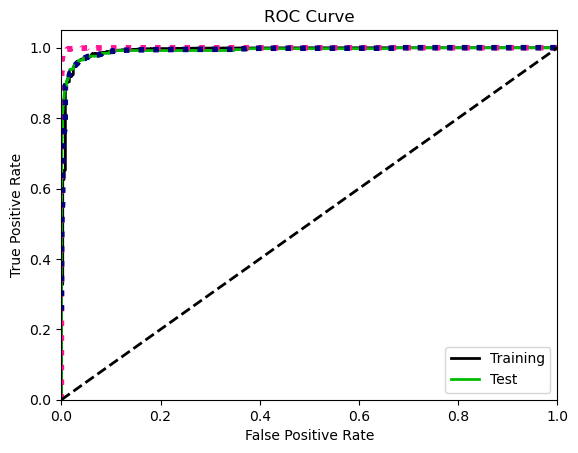

In [98]:
plt.figure(figsize=(8, 6))
skplt.metrics.plot_roc(trainDF_Y, estimator.predict_proba(trainDF_X))
skplt.metrics.plot_roc(testDF_Y, estimator.predict_proba(testDF_X))
plt.title("ROC Curve")
plt.legend(["Training", "Test"])
plt.show()

### (f) Use SMOTE to pre-process your data

In [102]:
smote = SMOTE()
trainDF_X_smote, trainDF_Y_smote = smote.fit_resample(trainDF_X, trainDF_Y)

In [104]:
trainDF_Y.value_counts()

class
0        59000
1         1000
Name: count, dtype: int64

In [105]:
trainDF_Y_smote.value_counts()

class
0        59000
1        59000
Name: count, dtype: int64

In [106]:
cv = KFold(n_splits = 5, shuffle = True, random_state = 42)
grid_cv_smote = GridSearchCV(estimator, alphas, cv=cv, scoring="accuracy")
grid_cv_smote.fit(trainDF_X_smote, trainDF_Y_smote)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.3, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     inte...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'reg_alpha': [0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 1, 2,
                                       3, 4, 5, 10, 20, 50, 100]},
             scoring='accuracy')

In [107]:
print(f'Best alpha: {grid_cv_smote.best_params_} with cross validation accuracy: {grid_cv_smote.best_score_}')

Best alpha: {'reg_alpha': 0.01} with cross validation accuracy: 0.9976864406779662


In [108]:
smote_estimator = XGBClassifier(objective='binary:logistic', reg_alpha = grid_cv_smote.best_params_['reg_alpha'], colsample_bytree = 0.3, use_label_encoder=False,)
smote_estimator.fit(trainDF_X, trainDF_Y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.3, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [109]:
y_train_pred = smote_estimator.predict(trainDF_X)
y_test_pred = smote_estimator.predict(testDF_X)

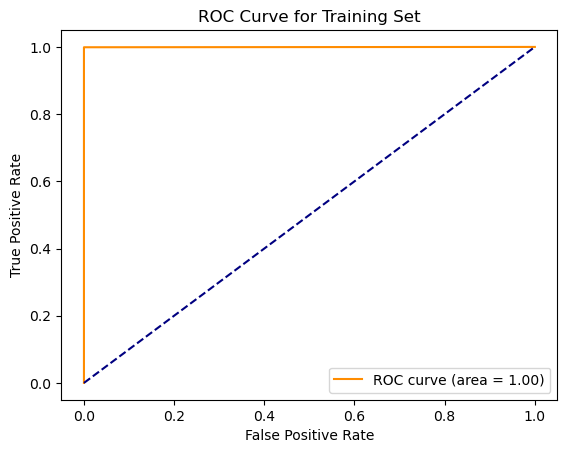

Confusion Matrix for Training Set:
[[59000     0]
 [    1   999]]
Accuracy for Training Set: 0.9999833333333333
AUC for Training Set: 0.9995
Misclassification for Training Set: 1.666666666666483e-05


In [110]:
confusion = confusion_matrix(trainDF_Y, y_train_pred)
accuracy = accuracy_score(trainDF_Y, y_train_pred)

fpr, tpr, _ = roc_curve(trainDF_Y, y_train_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for ' + 'Training Set')
plt.legend(loc="lower right")
plt.show()

print(f"Confusion Matrix for Training Set:\n{confusion}")
print(f"Accuracy for Training Set: {accuracy}")
print(f"AUC for Training Set: {roc_auc}")
print(f"Misclassification for Training Set: {1 - accuracy}")

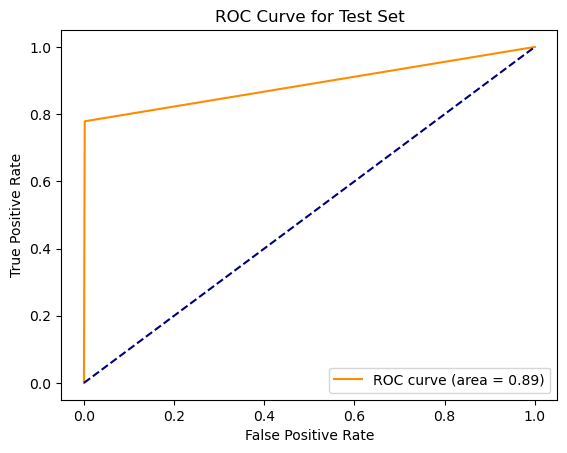

Confusion Matrix for Test Set:
[[15598    27]
 [   83   292]]
Accuracy for Test Set: 0.993125
AUC for Test Set: 0.8884693333333334
Misclassification for Test Set: 0.0068749999999999645


In [111]:
confusion = confusion_matrix(testDF_Y, y_test_pred)
accuracy = accuracy_score(testDF_Y, y_test_pred)

fpr, tpr, _ = roc_curve(testDF_Y, y_test_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for ' + 'Test Set')
plt.legend(loc="lower right")
plt.show()

print(f"Confusion Matrix for Test Set:\n{confusion}")
print(f"Accuracy for Test Set: {accuracy}")
print(f"AUC for Test Set: {roc_auc}")
print(f"Misclassification for Test Set: {1 - accuracy}")

<Figure size 800x600 with 0 Axes>

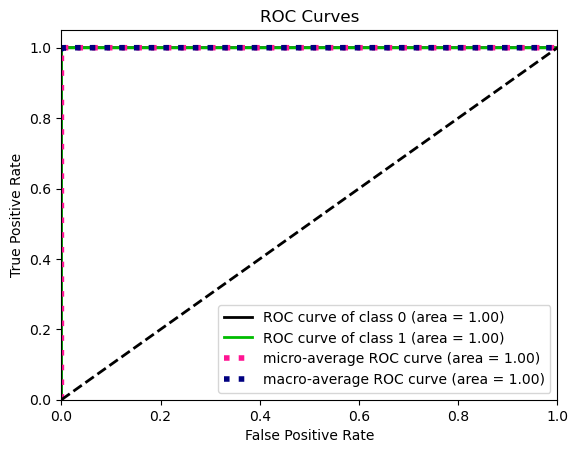

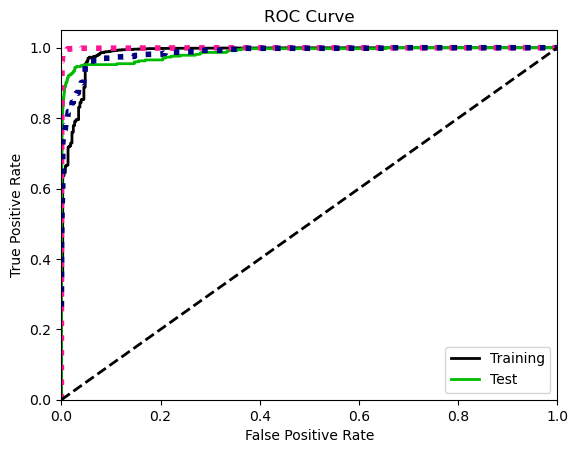

In [113]:
plt.figure(figsize=(8, 6))
skplt.metrics.plot_roc(trainDF_Y, smote_estimator.predict_proba(trainDF_X))
skplt.metrics.plot_roc(testDF_Y, smote_estimator.predict_proba(testDF_X))
plt.title("ROC Curve")
plt.legend(["Training", "Test"])
plt.show()

## 2. ISLR 6.6.3

a) (iv) Steadily decrease. Since as the value of s will increase, the beta contraint will reduce and so does the RSS until a least squares result is obtained.

b) (ii) Decrease initially, and then eventually start increasing in a U shape. RSS decreases but eventually increases due to overfitting.

c) (iii) Steadily increase. Variance increases with an increase in flexibility.

d (iv) Steadily decrease. Bias decreases with an increase in flexibility.

e) (v) Remain constant. Irreducible error is not related to the value of s.

## 3. ISLR 6.6.5

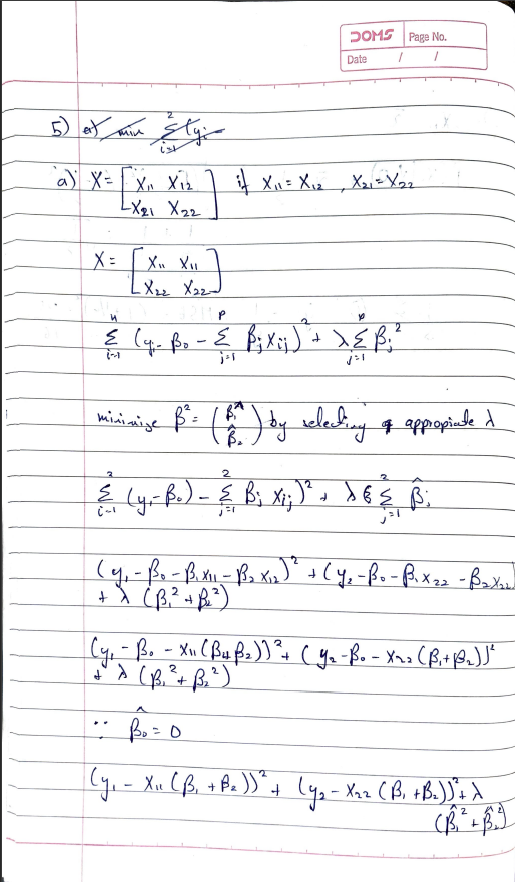

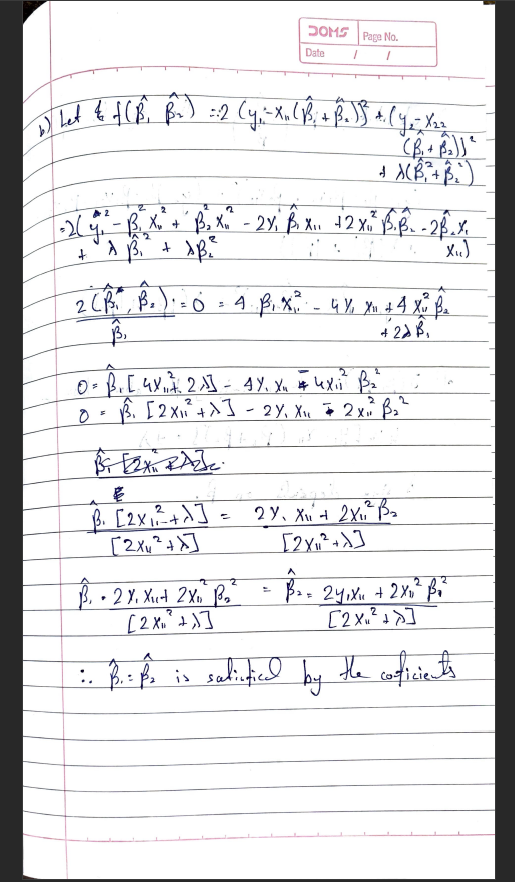

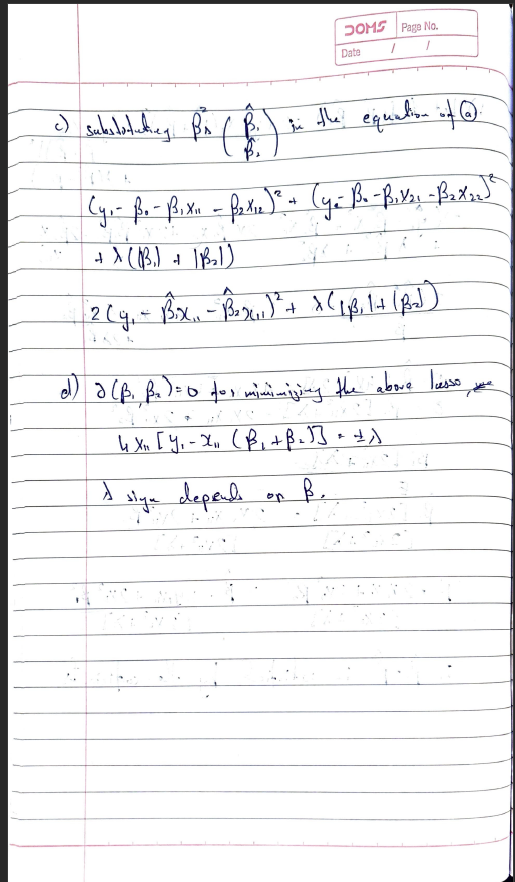

## 4. ISLR 8.4.5

Majority Polling: N(false) = 4 , N(true) = 6 . Thus, classification is red.

Average Probability: Average of given probabilities = 0.45 which is less than 0.5. Thus, classification is green.

## 5. ISLR 9.7.3

In [170]:
X = np.array([[3, 4], [2, 2],[4, 4],[1, 4],[2, 1],[4, 3],[4, 1]])
Y = ['Red', 'Red', 'Red', 'Red', 'Blue', 'Blue', 'Blue']

/var/folders/n6/bxq_v0552b73sl2s_298p9k80000gn/T/ipykernel_1378/1002069436.py:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)


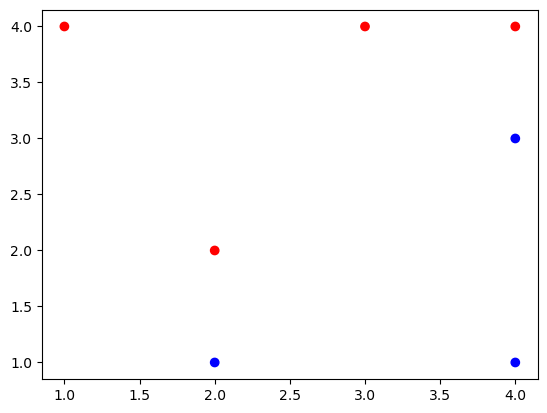

In [171]:
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)

In [172]:
clf = svm.SVC(kernel='linear', C=500)
clf.fit(X, Y)

SVC(C=500, kernel='linear')

In [173]:
w1, w2 = clf.coef_[0]
b = clf.intercept_[0]

xx, yy = np.meshgrid(np.arange(0, 5, 0.01), np.arange(0, 5, 0.01))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

/var/folders/n6/bxq_v0552b73sl2s_298p9k80000gn/T/ipykernel_1378/1298207621.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)


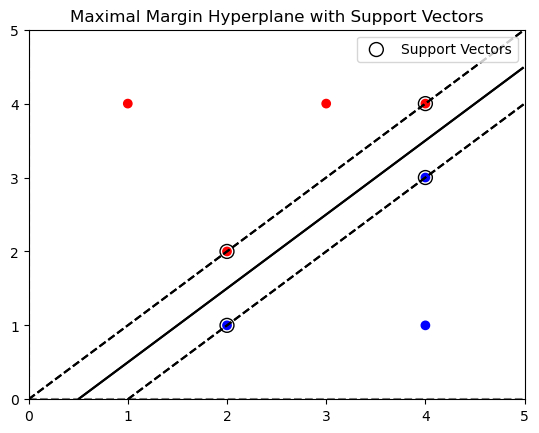

In [174]:
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)

plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'])
plt.title('Maximal Margin Hyperplane with Support Vectors')

sv = clf.support_vectors_
plt.scatter(sv[:, 0], sv[:, 1], s=100, facecolors='none', edgecolors='k', marker='o', label='Support Vectors')

plt.xlim(0, 5)
plt.ylim(0, 5)

margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
xx, yy = np.meshgrid(np.arange(0, 5, 0.01), np.arange(0, 5, 0.01))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'])
plt.axhline(0, color='black', alpha=0.5, linestyle='--')
plt.axvline(0, color='black', alpha=0.5, linestyle='--')

plt.legend()
plt.show()

In [175]:
print(f"The equation of the optimal separating hyperplane is: {w1}*X1 + {w2}*X2 + {b} = 0")

The equation of the optimal separating hyperplane is: -1.999414062500001*X1 + 1.9994140625*X2 + 0.9997070312500023 = 0


### b)
The solid black line represents the hyperplane.

### c)
B0 = 1, B1 = -1, B2 = 2
If B0 +B1.X1 + B2.X2 > 0, the answer is Red, else, Blue

### d)
The maximal margi hyperplane is plotted with dashed lines.

### e)
The support vectors are represented by the circled values.

### f)
The seventh point is too far from the hyperplane boundry so it does not have any effect.

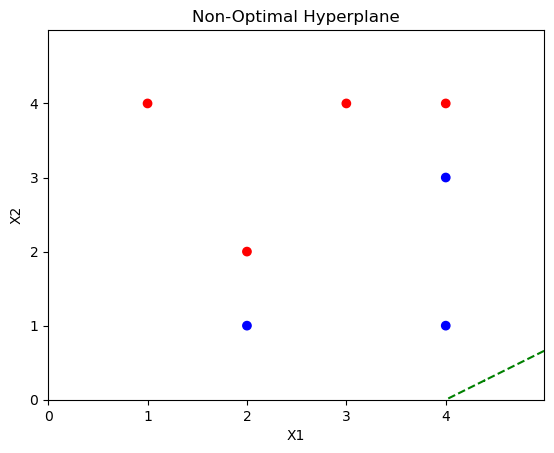

In [165]:
# Plot the data points
plt.scatter(X[:, 0], X[:, 1], marker='o', c=['Red', 'Red', 'Red', 'Red', 'Blue', 'Blue', 'Blue'])

# Define the coefficients of the non-optimal hyperplane
w1, w2, b = 2, -3, -8

# Create a meshgrid for plotting
xx, yy = np.meshgrid(np.arange(0, 5, 0.01), np.arange(0, 5, 0.01))

# Equation of the non-optimal hyperplane
Z = w1 * xx + w2 * yy + b

# Plot the non-optimal hyperplane
plt.contour(xx, yy, Z, colors='green', levels=[0], linestyles='dashed')

plt.title('Non-Optimal Hyperplane')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

### g)
The green plane is clearly not optimal and is represented by 2∗X1−3∗X2−8=0 

/var/folders/n6/bxq_v0552b73sl2s_298p9k80000gn/T/ipykernel_1378/4200394943.py:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)


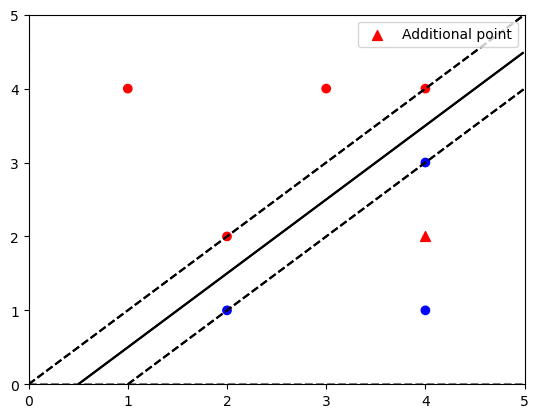

In [178]:
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)

plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'])
plt.title('')

sv = clf.support_vectors_
plt.scatter([4.0], [2.0], color='r', marker='^', s=50, label="Additional point")


plt.xlim(0, 5)
plt.ylim(0, 5)

margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
xx, yy = np.meshgrid(np.arange(0, 5, 0.01), np.arange(0, 5, 0.01))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'])
plt.axhline(0, color='black', alpha=0.5, linestyle='--')
plt.axvline(0, color='black', alpha=0.5, linestyle='--')

plt.legend()
plt.show()